## Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

##Making Requests

In [ ]:
url = "https://haycar.am/am/sale/search?category=car&tax=1&page=1"
page = requests.get(url)

print(page.ok)

True


##Getting the Page Content

In [ ]:
soup = BeautifulSoup(page.content,"html.parser")

##Defining the Number of Pages

In [ ]:
num_pages = 100

## Obtaining the page HTML structure


In [ ]:
soup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>  Ավտոմեքենաների վաճառք Հայաստանում - HayCar.am</title>
<meta content="VloEPzFVB-LzhT2ky-RR1ZUAdDK7SWPNTAWiuD-QDfU" name="google-site-verification">
<meta content="HayCar-ը տրամադրում է հարթակ ավտոմեքենաների առք և վաճառքի, ավտովարձույթի, ավտոպահեստամասերի վաճառքի, ավտոդպրոցների, ավտո տեխսպասարկման կետերի հայտարարությունների համար" name="description">
<meta content="ավտոմեքենաների վաճառք, ավտոմեքենաների վաճառք հայաստանում, ավտոմեքենաների և պահեստամասերի առք ու վաճառք, բեռնատար ավտոմեքենաներ, ավտո վարձակալություն, ավտոշուկա, պահեստամասեր, էվակուատոր," name="keywords"/>
<meta content="https://haycar.am/assets/img/logo_1200x630.jpg" property="og:image"/>
<link href="/assets/img/favicon-32x32.png" rel="icon"/>
<link href="/assets/img/favicon-16x16.png" rel="icon"/>
<link href="/assets/img/favicon.ico" rel="shortcut icon"/>
<link href="/assets/img/app-touch/ap

In [ ]:
soup.findAll('div', class_='col-lg-8 col-md-7 col-sm-7 no-padding-left car-filter-style')

[<div class="col-lg-8 col-md-7 col-sm-7 no-padding-left car-filter-style">
 <div class="content-inner">
 <div class="filter-left-inner pull-left">
 <h3>
 <a href="/am/car/sale/Kia-Soul-2017-5148">Kia Soul</a>
 <span class="year">, 2017</span>
 </h3>
 <div class="subtitle"> Գերազանց </div><!-- /.subtitle -->
 <div class="price"><i class="haycar-dollar"></i> 11,500</div><!-- /.price -->
 <div class="subtitle"><i class="haycar-flag"></i> Հայաստան </div>
 </div>
 <div class="filter-right-inner pull-right">
 <ul class="filter-right-list">
 <li class="tax"><i class="haycar-tax"></i> Մաքսազերծված</li>
 <li class="date-time">Թարմացվել է`  Փետրվար 26, 2024</li>
 </ul>
 </div>
 <div class="cb"></div>
 </div><!-- /.content-inner -->
 <div class="meta">
 <ul>
 <li><i class="haycar-mileage"></i>88000 կմ</li>
 <li><i class="haycar-automat"></i> Ավտոմատ </li>
 <li><i class="haycar-steering-wheel"></i> Ձախ </li>
 <li><i class="haycar-color-1"></i> Ոսկեգույն </li>
 </ul>
 </div><!-- /.meta -->
 </div>,

##Defining the Initial Arrays

In [ ]:
years = []
names = []
mileages = []
wheels = []
transmissions = []
conditions = []
colors = []
prices = []
currencies = []

##Performing Web Scraping and Saving the Values Inside the Arrays

In [ ]:
for i in range(1, num_pages):
  url1 =  f"https://haycar.am/am/sale/search?category=car&tax=1&page={i}"
  page1 = requests.get(url1)
  soup1 = BeautifulSoup(page1.content, "html.parser")
  items = soup1.findAll('div', class_='col-lg-8 col-md-7 col-sm-7 no-padding-left car-filter-style')
  for item in items:
    header = item.find('h3')
    if item.find('div', class_='price').find('i') is None:
      currencies.append(None)
    else:
      currencies.append(item.find('div', class_='price').find('i').get('class')[0].split('-')[1])
    names.append(header.find('a').text.strip())
    years.append(header.find('span').text.strip())
    conditions.append(item.findAll('div', class_='subtitle')[0].text.strip())
    prices.append(item.find('div', class_='price').text.strip())
    other_features = list(item.find('div', class_='meta').find('ul').children)
    mileages.append(other_features[1].text)
    transmissions.append(other_features[3].text)
    wheels.append(other_features[5].text)
    colors.append(other_features[7].text)

##Creating the DataFrame

In [ ]:
data = {'Name': names, 'Year': years, 'Steering Wheel': wheels, 'Mileage': mileages, 'Transmission': transmissions,
        'Color': colors, 'Condition': conditions, 'Price': prices, 'Currency': currencies}

df = pd.DataFrame(data)

In [ ]:
len(df)

2970

In [ ]:
df.head()

,Name,Year,Steering Wheel,Mileage,Transmission,Color,Condition,Price,Currency
0,Kia Soul,", 2017",Ձախ,88000 կմ,Ավտոմատ,Ոսկեգույն,Գերազանց,"11,500",dollar
1,Opel Astra,", 2000",Ձախ,300000 կմ,Մեխանիկական,Մոխրագույն,Լավ,"5,100",dollar
2,Land Rover Range Rover Sport,", 2008",Ձախ,75000 մղոն,Ավտոմատ,Սև,Գերազանց,"7,900",dollar
3,Toyota Camry,", 2015",Ձախ,188000 կմ,Ավտոմատ,Սև,Լավ,"12,300",dollar
4,Mazda Այլ,", 2021",Ձախ,28800 մղոն,Ավտոմատ,Սպիտակ,Գերազանց,"27,500",dollar


## Observing Which Values Are None

In [ ]:
for column in df.columns:
    nan_count = df[column].isna().sum()
    print(f"Column '{column}' has {nan_count} NaN values.")

Column 'Name' has 0 NaN values.
Column 'Year' has 0 NaN values.
Column 'Steering Wheel' has 0 NaN values.
Column 'Mileage' has 0 NaN values.
Column 'Transmission' has 0 NaN values.
Column 'Color' has 0 NaN values.
Column 'Condition' has 0 NaN values.
Column 'Price' has 0 NaN values.
Column 'Currency' has 121 NaN values.


##Getting the Initial Information about DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            2970 non-null   object
 1   Year            2970 non-null   object
 2   Steering Wheel  2970 non-null   object
 3   Mileage         2970 non-null   object
 4   Transmission    2970 non-null   object
 5   Color           2970 non-null   object
 6   Condition       2970 non-null   object
 7   Price           2970 non-null   object
 8   Currency        2849 non-null   object
dtypes: object(9)
memory usage: 209.0+ KB


##Modifying Features

In [ ]:
modified_year = []
for year in df['Year']:
    modified_year.append(year.split(' ')[1])

In [ ]:
df['Year'] = modified_year

In [ ]:
set(df['Currency'])

{None, 'dollar', 'dram', 'euro', 'rubli'}

##Defining helper Functions to perform conversions

In [ ]:
def currency_to_dollar(cur, price):
    if cur == 'dram':
      return int(price) * 0.0021
    if cur == 'euro':
      return int(price) * 1.09
    if cur == 'rubli':
      return int(price) * 0.011
    if cur is None:
      return np.nan
    return int(price)

In [ ]:
mileages = []

for mileage in df['Mileage']:
    if mileage.split(' ')[1].strip() == 'մղոն':
      mileages.append(int(int(mileage.split(' ')[0]) * 1.61))
    else:  mileages.append(int(mileage.split(' ')[0]))

print(mileages)

[88000, 300000, 120750, 188000, 46368, 285000, 70000, 40000, 420000, 280000, 230000, 19320, 1111111, 45080, 230000, 80000, 97000, 62538, 170000, 270000, 238000, 200000, 215000, 67000, 276, 277000, 57155, 320000, 120000, 200000, 89677, 187000, 18000, 93380, 205000, 180320, 260000, 160000, 230000, 61500, 76000, 340000, 46000, 75000, 20000, 350000, 30000, 180000, 20000, 202000, 180000, 5, 106260, 153000, 90160, 210147, 250, 116725, 48300, 230000, 116000, 241500, 230230, 280000, 115000, 300000, 135000, 32, 20000, 199000, 309584, 285000, 180000, 130000, 240519, 37000, 19000, 311, 90000, 200000, 35581, 87, 226000, 121000, 350000, 240000, 99015, 2176, 145000, 110000, 100000, 180000, 90000, 300000, 210000, 69000, 122360, 153000, 109000, 2500, 13000, 44300, 60697, 22800, 213472, 180000, 138, 98, 120000, 284000, 141, 16500, 155000, 77000, 272090, 197000, 150, 385000, 110909, 236474, 60500, 265000, 99000, 65000, 98210, 220000, 150000, 158955, 40250, 400000, 170000, 320000, 300000, 159000, 193200,

In [ ]:
df['Mileage'] = mileages

In [ ]:
df['Mileage']

0        88000
1       300000
2       120750
3       188000
4        46368
         ...  
2965     75000
2966    150000
2967    100000
2968    187000
2969    200000
Name: Mileage, Length: 2970, dtype: int64

In [ ]:
modified_price = []

count = 0
for currency, price in zip(df["Currency"], df["Price"]):
  modified_price.append(currency_to_dollar(currency, price.replace(',', '')))


In [ ]:
df['Price'] = np.array(modified_price)

## Analyzing Correlations

In [ ]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Mileage,Price
Mileage,1.000000,-0.000943
Price,-0.000943,1.000000


In [ ]:
from sklearn.impute import SimpleImputer

##Imputing Missing Values with Median

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

price_median_replaced = imp_median.fit_transform(np.array(df['Price']).reshape(-1, 1))

In [ ]:
# max_value_index = df['Mileage'].idxmax()
# max_value_index2 = df['Price'].idxmax()

# df.drop(max_value_index, inplace=True)
# df.drop(max_value_index2, inplace=True)
# price_median_replaced = np.delete(price_median_replaced, max_value_index)
# price_median_replaced = np.delete(price_median_replaced, max_value_index2)

In [ ]:
df['Price'] = price_median_replaced

In [ ]:
file_path = '/content/car_data.csv'
df.to_csv(file_path, index=False)

##Performing Data Visualization

In [ ]:
# condition_numerical = []

# for item in df['Condition']:
#   if item.strip() == 'Գերազանց':
#     condition_numerical.append(0)
#   elif item.strip() == 'Լավ':
#     condition_numerical.append(1)
#   elif item.strip() == 'Նորմալ':
#     condition_numerical.append(2)
#   elif item.strip() == 'Պահեստամասեր':
#     condition_numerical.append(3)
#   elif item.strip() == 'Վթարված':
#     condition_numerical.append(4)


In [ ]:
index = list(df['Price']).index(max(df['Price']))

df.drop(index, inplace=True)

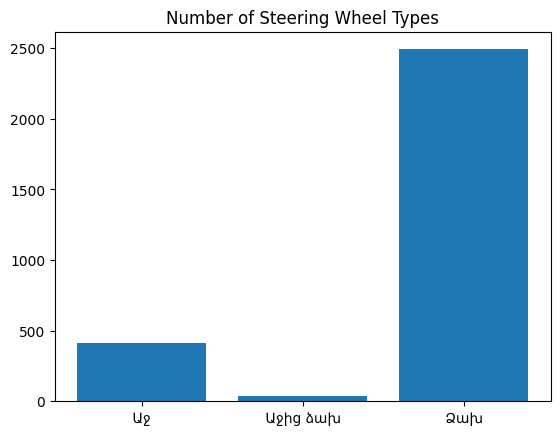

In [ ]:
unique_wheels, count_wheels = np.unique(df['Steering Wheel'], return_counts=True)

wheel_counts = dict(zip(unique_wheels, count_wheels))

plt.title('Number of Steering Wheel Types')

plt.bar(wheel_counts.keys(), wheel_counts.values())

plt.show()

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


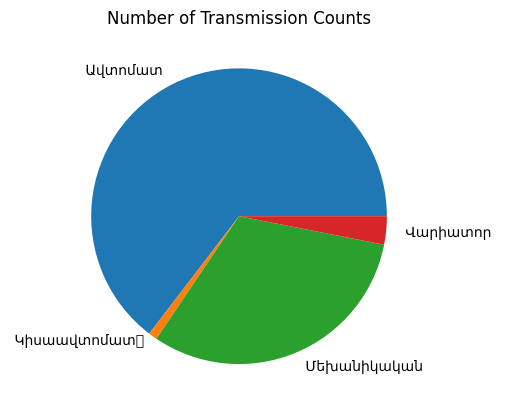

In [ ]:
unique_transmissions, count_transmissions = np.unique(df['Transmission'], return_counts=True)

transmission_counts = dict(zip(unique_transmissions, count_transmissions))

plt.title('Number of Transmission Counts')

plt.pie(transmission_counts.values(), labels=transmission_counts.keys())

plt.show()

In [ ]:
df['Year'] = df['Year'].astype(int)

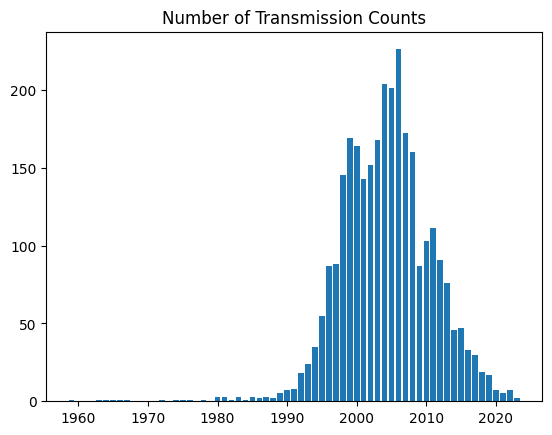

In [ ]:
unique_years, count_years = np.unique(df['Year'], return_counts=True)

years_counts = dict(zip(unique_years, count_years))

plt.title('Number of Transmission Counts')

plt.bar(years_counts.keys(), years_counts.values())

plt.show()

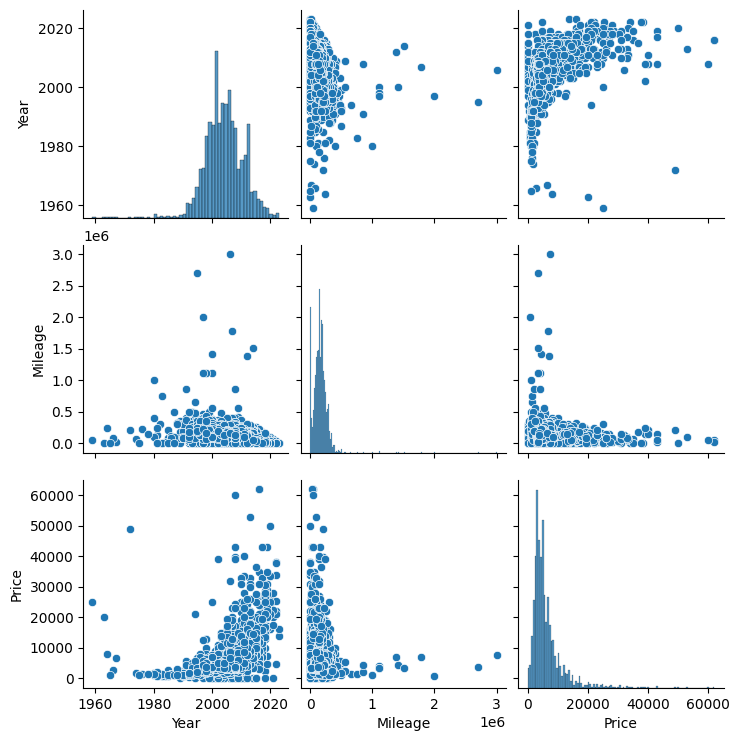

In [ ]:
import seaborn as sns

sns.pairplot(df)

In [ ]:
df.columns

Index(['Name', 'Year', 'Steering Wheel', 'Mileage', 'Transmission', 'Color',
       'Condition', 'Price', 'Currency'],
      dtype='object')

In [ ]:
df = df.drop('Currency', axis=1)

##Performing One Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Steering Wheel', 'Color', 'Condition', 'Transmission', 'Name'], prefix='Category')

In [ ]:
df_encoded

,Year,Mileage,Price,Category_ Աջ,Category_ Աջից ձախ,Category_ Ձախ,Category_ Այլ գույն,Category_ Արծաթագույն,Category_ Բալագույն,Category_ Բեժ,...,Category_Volkswagen Touran,Category_Volkswagen Vento,Category_Volkswagen Այլ,Category_Volvo 850,Category_Volvo S40,Category_Volvo S60,Category_Volvo S80,Category_Volvo XC90,Category_ZAZ-Tavria Sens,Category_Այլ Այլ
0,2006,238000,13500.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2005,200000,3900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1994,215000,21084.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1989,67000,2500.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,276,16000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,1998,355000,2500.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2966,1998,167000,3700.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2967,2006,167000,6500.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2968,2011,100000,8500.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Performing Scaling via MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['Year', 'Mileage', 'Price']

scaler = MinMaxScaler()

df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [ ]:
df_encoded.head(20)

,Year,Mileage,Price,Category_ Աջ,Category_ Աջից ձախ,Category_ Ձախ,Category_ Այլ գույն,Category_ Արծաթագույն,Category_ Բալագույն,Category_ Բեժ,...,Category_Volkswagen Touran,Category_Volkswagen Vento,Category_Volkswagen Այլ,Category_Volvo 850,Category_Volvo S40,Category_Volvo S60,Category_Volvo S80,Category_Volvo XC90,Category_ZAZ-Tavria Sens,Category_Այլ Այլ
0,0.734375,0.079333,0.217742,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.718750,0.066667,0.062903,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.546875,0.071667,0.340064,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.468750,0.022333,0.040322,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.765625,0.000092,0.258064,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.640625,0.092333,0.064516,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.343750,0.043333,0.012097,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0.828125,0.019052,0.169355,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.796875,0.106667,0.258064,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.671875,0.040000,0.048387,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
csv_file_path = '/content/drive/My Drive/car_data.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(csv_file_path)

<ipython-input-30-9374da697636>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

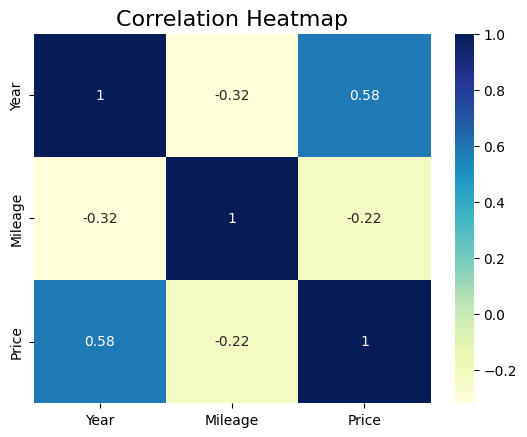

In [ ]:
import seaborn as sb

dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
dataplot.set_title("Correlation Heatmap", fontsize=16)

In [ ]:
sorted_indices = df["Price"].sort_values(ascending=False).index
sorted_indices[:10]

Int64Index([2504, 714, 2151, 145, 192, 17, 101, 850, 1510, 189], dtype='int64')

In [ ]:
df.drop(sorted_indices[:30], inplace=True)

In [ ]:
sorted_indices_mileage = df["Mileage"].sort_values(ascending=False).index
df.drop(sorted_indices_mileage[:30], inplace=True)

In [ ]:
condition_numerical = []

for item in df['Condition']:
  if item.strip() == 'Գերազանց':
    condition_numerical.append(0)
  elif item.strip() == 'Լավ':
    condition_numerical.append(1)
  elif item.strip() == 'Նորմալ':
    condition_numerical.append(2)
  elif item.strip() == 'Պահեստամասեր':
    condition_numerical.append(3)
  elif item.strip() == 'Վթարված':
    condition_numerical.append(4)

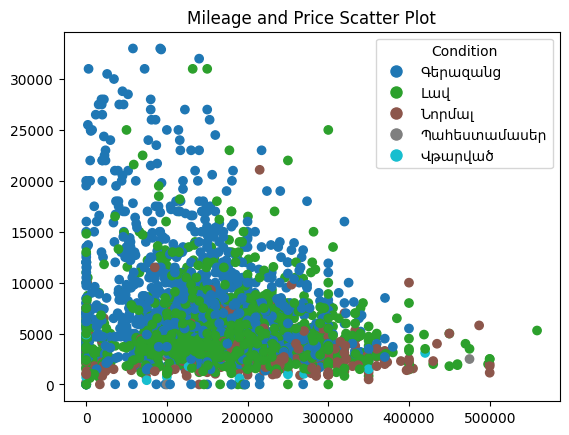

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Your color map dictionary
color_map = {0: 'Գերազանց', 1: 'Lավ', 2: 'Նորմալ' , 3: 'Պահեստամասեր' , 4: 'Վթարված'}

# Create your scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(df["Mileage"], df["Price"], c=condition_numerical, cmap='tab10')

# Generate legend elements
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=scatter.cmap(scatter.norm(value)), markersize=10)
           for value, label in color_map.items()]

# Plot legend
legend1 = ax.legend(handles=handles, labels=color_map.values(),
                    loc="upper right", title="Condition")

plt.title("Mileage and Price Scatter Plot")
plt.show()

[<matplotlib.lines.Line2D object at 0x7efdeb2e4f70>, <matplotlib.lines.Line2D object at 0x7efdeb2e5030>, <matplotlib.lines.Line2D object at 0x7efdeb2e5120>, <matplotlib.lines.Line2D object at 0x7efdeb2e5210>, <matplotlib.lines.Line2D object at 0x7efdeb2e5300>] ['$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$', '$\\mathdefault{3}$', '$\\mathdefault{4}$']


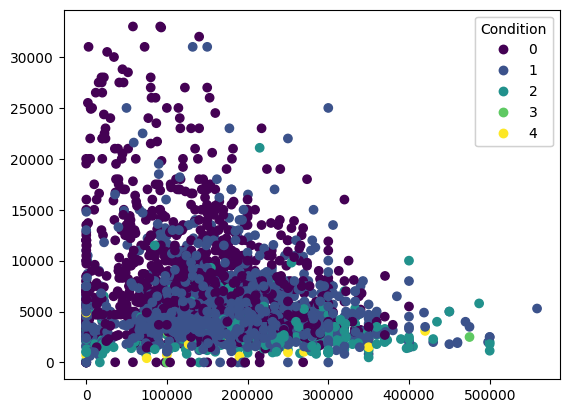

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

scatter = ax.scatter(df["Mileage"], df["Price"], c=condition_numerical)

print(*scatter.legend_elements())

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Condition")
ax.add_artist(legend1)

Text(0.5, 1.0, 'Mileage and Price Plot, With Marked Categories')

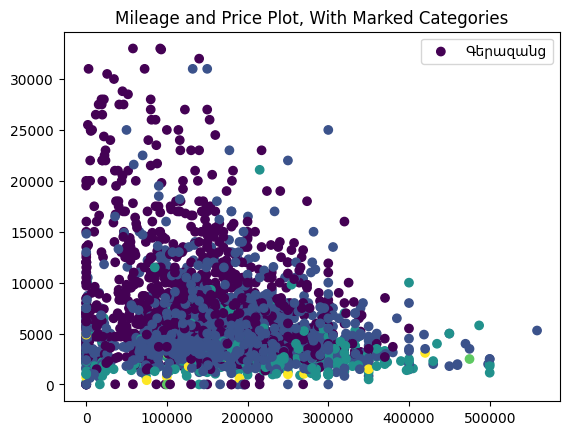

In [ ]:
plt.scatter(df['Mileage'], df['Price'], c=condition_numerical)
plt.legend(['Գերազանց',  'Lավ', 'Նորմալ', 'Պահեստամասեր' , 'Վթարված'])
plt.title("Mileage and Price Plot, With Marked Categories")

Continuation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Price']

X = df.drop('Price', axis=1)

In [ ]:
df.drop('Currency', axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train)

2328

In [ ]:
len(X_test)

582

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
cat_columns = X_train.select_dtypes(include=['object']).columns
print(cat_columns)

Index(['Name', 'Steering Wheel', 'Transmission', 'Color', 'Condition',
       'Currency'],
      dtype='object')


In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[list(cat_columns)])


X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[list(cat_columns)])

X_train = X_train.drop(cat_columns, axis=1)


scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[list(cat_columns)])

X_test = X_test.drop(cat_columns, axis=1)

X_test = scaler.transform(X_test)

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metric
}


In [ ]:
knn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (MSE):", best_score)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Score (MSE): -11232662.619425682


In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=11, metric='manhattan')

knn_reg.fit(X_train, y_train)

y_predictions = knn_reg.predict(X_test)

print("RMSE: ", mean_squared_error(y_test, y_predictions) ** 0.5)
print("MSE: ", mean_squared_error(y_test, y_predictions))
print("MAE: ", mean_absolute_error(y_test, y_predictions))
print("R2 Score: ", r2_score(y_test, y_predictions))

RMSE:  3591.9251986783265
MSE:  12901926.632900337
MAE:  2000.3902303498908
R2 Score:  0.42028890836955257


In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_predictions_linreg = linear_reg.predict(X_test)

print("RMSE: ", mean_squared_error(y_test, y_predictions_linreg) ** 0.5)
print("MSE: ", mean_squared_error(y_test, y_predictions_linreg))
print("MAE: ", mean_absolute_error(y_test, y_predictions_linreg))
print("R2 Score: ", r2_score(y_test, y_predictions_linreg))

RMSE:  1.5754389598630202e+16
MSE:  2.4820079162542748e+32
MAE:  4232185881291895.0
R2 Score:  -1.1152191137857423e+25


In [ ]:
ridge = Ridge()
ridge_gs = GridSearchCV(ridge, {'alpha': [1e-5,1e-4,1e-3,1e-2,0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10,20,30,40,50,100, 200, 300, 400,500,510, 515, 520, 1000, 1100, range(1111,1200)]}, scoring='r2')

ridge_gs.fit(X_train, y_train)

print("Best hyperparameters: ", ridge_gs.best_params_)
print("Best Score: ", ridge_gs.best_score_)

Best hyperparameters:  {'alpha': 50}
Best Score:  0.5827222424785833


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1123, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

In [ ]:
ridge = Ridge(alpha=50)

ridge.fit(X_train, y_train)

y_predictions_ridge = ridge.predict(X_test)

print("RMSE: ", mean_squared_error(y_test, y_predictions_ridge) ** 0.5)
print("MSE: ", mean_squared_error(y_test, y_predictions_ridge))
print("MAE: ", mean_absolute_error(y_test, y_predictions_ridge))
print("R2 Score: ", r2_score(y_test, y_predictions_ridge))

RMSE:  3252.0961796183315
MSE:  10576129.561488148
MAE:  1720.7555779046654
R2 Score:  0.5247919331923006


In [ ]:
lasso = Lasso()
lasso_gs = GridSearchCV(lasso, {'alpha': [1e-5,1e-4,1e-3,1e-2,0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10,20,30,40,50,100, 200, 300, 400,500,510, 515, 520, 1000, 1100, range(1111,1200)]}, scoring='r2')

lasso_gs.fit(X_train, y_train)

print("Best hyperparameters: ", lasso_gs.best_params_)
print("Best Score: ", lasso_gs.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.530e+08, tolerance: 4.024e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+08, tolerance: 3.980e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.344e+08, tolerance: 3.881e

Best hyperparameters:  {'alpha': 20}
Best Score:  0.5858513118557435


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 892, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-package

In [ ]:
lasso = Lasso(alpha=20)

lasso.fit(X_train, y_train)

y_predictions_lasso = lasso.predict(X_test)

print("RMSE: ", mean_squared_error(y_test, y_predictions_lasso) ** 0.5)
print("MSE: ", mean_squared_error(y_test, y_predictions_lasso))
print("MAE: ", mean_absolute_error(y_test, y_predictions_lasso))
print("R2 Score: ", r2_score(y_test, y_predictions_lasso))

RMSE:  3249.497549991849
MSE:  10559234.32740303
MAE:  1721.6227439154138
R2 Score:  0.5255510721080234


In [ ]:
el_net = ElasticNet()
el_net_gs = GridSearchCV(el_net, {'alpha': [1e-5,1e-4,1e-3,1e-2,0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10,20,30,40,50,100, 200, 300, 400,500,510, 515, 520, 1000, 1100, range(1111,1200)]}, scoring='r2')

el_net_gs.fit(X_train, y_train)

print("Best hyperparameters: ", el_net_gs.best_params_)
print("Best Score: ", el_net_gs.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.823e+09, tolerance: 4.024e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.863e+09, tolerance: 3.980e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.864e+09, tolerance: 3.881e

Best hyperparameters:  {'alpha': 0.1}
Best Score:  0.5828200136858689


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 892, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-package

In [ ]:
el_net = ElasticNet(alpha=50)

el_net.fit(X_train, y_train)

y_predictions_el_net = el_net.predict(X_test)

print("RMSE: ", mean_squared_error(y_test, y_predictions_el_net) ** 0.5)
print("MSE: ", mean_squared_error(y_test, y_predictions_el_net))
print("MAE: ", mean_absolute_error(y_test, y_predictions_el_net))
print("R2 Score: ", r2_score(y_test, y_predictions_el_net))

RMSE:  4507.233106344156
MSE:  20315150.274924792
MAE:  2957.549184953019
R2 Score:  0.08719695301307107


In [ ]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 9],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

dt_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (MSE):", -best_score)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score (MSE): 9448012.657742156


In [ ]:
dt_reg = DecisionTreeRegressor(max_depth=9, min_samples_leaf=1, min_samples_split=5)

dt_reg.fit(X_train, y_train)

y_predictions_dt_reg = dt_reg.predict(X_test)

print("RMSE: ", mean_squared_error(y_test, y_predictions_dt_reg) ** 0.5)
print("MSE: ", mean_squared_error(y_test, y_predictions_dt_reg))
print("MAE: ", mean_absolute_error(y_test, y_predictions_dt_reg))
print("R2 Score: ", r2_score(y_test, y_predictions_dt_reg))

RMSE:  3445.6516447317044
MSE:  11872515.256842298
MAE:  1947.7822722866442
R2 Score:  0.46654255788493937


In [ ]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_predictions_rf_reg = rf_reg.predict(X_test)

print("RMSE: ", mean_squared_error(y_test, y_predictions_rf_reg) ** 0.5)
print("MSE: ", mean_squared_error(y_test, y_predictions_rf_reg))
print("MAE: ", mean_absolute_error(y_test, y_predictions_rf_reg))
print("R2 Score: ", r2_score(y_test, y_predictions_rf_reg))

RMSE:  3106.597002735974
MSE:  9650944.937408136
MAE:  1605.0335869835544
R2 Score:  0.5663624523593718


In [ ]:
gradient_boost_regressor = GradientBoostingRegressor()

gradient_boost_regressor.fit(X_train, y_train)

y_predictions_grb_reg = gradient_boost_regressor.predict(X_test)

print("RMSE: ", mean_squared_error(y_test, y_predictions_grb_reg) ** 0.5)
print("MSE: ", mean_squared_error(y_test, y_predictions_grb_reg))
print("MAE: ", mean_absolute_error(y_test, y_predictions_grb_reg))
print("R2 Score: ", r2_score(y_test, y_predictions_grb_reg))

RMSE:  3203.603220236794
MSE:  10263073.592711557
MAE:  1808.8763279147006
R2 Score:  0.538858205816896
